In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## For one Person

In [2]:
# Load the CSV files
annotations = pd.read_csv(r".\1101\1101_annotate.csv")
sensor_data = pd.read_csv(r".\1101\1101_sensorData.csv")

In [3]:
# Convert Unix time to a human-readable format
annotations['timestamp'] = pd.to_datetime(annotations['unix time'], unit='ms')
sensor_data['timestamp'] = pd.to_datetime(sensor_data['Unix Time'], unit='ms')

In [4]:
sensor_data

,Unix Time,Sensor,Value1,Value2,Value3,timestamp
0,1405958662457,MPL Magnetic Field,31.533203,-19.916935,-22.601723,2014-07-21 16:04:22.457
1,1405958662459,MPL Rotation Vector,0.462228,-0.480602,-0.490234,2014-07-21 16:04:22.459
2,1405958662553,MPL Linear Acceleration,0.042048,-0.291195,0.021697,2014-07-21 16:04:22.553
3,1405958662576,MPL Gravity,0.860416,9.706243,1.102979,2014-07-21 16:04:22.576
4,1405958662612,MPL Gyroscope,-0.026058,-0.004421,0.003323,2014-07-21 16:04:22.612
...,...,...,...,...,...,...
129785,1405966050890,MPL Accelerometer,0.408211,9.539697,0.353145,2014-07-21 18:07:30.890
129786,1405966050892,MPL Magnetic Field,10.990790,-28.284224,-19.397615,2014-07-21 18:07:30.892
129787,1405966050894,MPL Rotation Vector,0.694823,-0.044986,-0.020579,2014-07-21 18:07:30.894
129788,1405966050896,MPL Linear Acceleration,0.055665,-0.256030,0.055216,2014-07-21 18:07:30.896


In [5]:
# Removing light sensor data no use

sensor_data = sensor_data[sensor_data['Sensor'] != 'LTR-506ALS Light sensor']
print(sensor_data)


            Unix Time                   Sensor     Value1     Value2  \
0       1405958662457       MPL Magnetic Field  31.533203 -19.916935   
1       1405958662459      MPL Rotation Vector   0.462228  -0.480602   
2       1405958662553  MPL Linear Acceleration   0.042048  -0.291195   
3       1405958662576              MPL Gravity   0.860416   9.706243   
4       1405958662612            MPL Gyroscope  -0.026058  -0.004421   
...               ...                      ...        ...        ...   
129785  1405966050890        MPL Accelerometer   0.408211   9.539697   
129786  1405966050892       MPL Magnetic Field  10.990790 -28.284224   
129787  1405966050894      MPL Rotation Vector   0.694823  -0.044986   
129788  1405966050896  MPL Linear Acceleration   0.055665  -0.256030   
129789  1405966050897              MPL Gravity   0.352546   9.795727   

           Value3               timestamp  
0      -22.601723 2014-07-21 16:04:22.457  
1       -0.490234 2014-07-21 16:04:22.459  
2  

In [6]:
# Assuming sensor_data and annotations DataFrames are already defined
numeric_columns = ['Value1', 'Value2', 'Value3']
sensor_data_resampled = (sensor_data
    .set_index('timestamp')
    .groupby('Sensor')[numeric_columns]
    .resample('200ms')
    .mean()
    .reset_index()
)

# Sort both DataFrames by timestamp
sensor_data_resampled = sensor_data_resampled.sort_values('timestamp')
annotations = annotations.sort_values('timestamp')

# Merge with annotations using nearest merge
sensor_data_aligned = pd.merge_asof(
    sensor_data_resampled, 
    annotations[['timestamp', 'Activity', 'Status']],
    on='timestamp',
    direction='nearest'
)
# print(sensor_data_aligned)
# Interpolate missing sensor data to fill gaps
sensor_data_aligned.interpolate(method='linear', inplace=True)

# Display the first few rows of the aligned data
print(sensor_data_aligned)

                         Sensor               timestamp     Value1     Value2  \
0       MPL Linear Acceleration 2014-07-21 16:04:22.400   0.042048  -0.291195   
1           MPL Rotation Vector 2014-07-21 16:04:22.400   0.462228  -0.480602   
2            MPL Magnetic Field 2014-07-21 16:04:22.400  31.533203 -19.916935   
3                   MPL Gravity 2014-07-21 16:04:22.400   0.860416   9.706243   
4           MPL Rotation Vector 2014-07-21 16:04:22.600   0.460899  -0.480405   
...                         ...                     ...        ...        ...   
221651            MPL Gyroscope 2014-07-21 18:07:30.800  -0.020169  -0.019334   
221652       MPL Magnetic Field 2014-07-21 18:07:30.800  10.990790 -28.284224   
221653  MPL Linear Acceleration 2014-07-21 18:07:30.800   0.055665  -0.256030   
221654        MPL Accelerometer 2014-07-21 18:07:30.800   0.408211   9.539697   
221655      MPL Rotation Vector 2014-07-21 18:07:30.800   0.694823  -0.044986   

           Value3       Act

C:\Users\rohan\AppData\Local\Temp\ipykernel_9288\3138905298.py:24: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  sensor_data_aligned.interpolate(method='linear', inplace=True)


In [7]:
sensor_data_aligned.to_csv(r".\1101\1101_sensor_data_aligned.csv", index=False, header=True, encoding='utf-8')


Exploratory Data Analysis

In [8]:
sensor_data_aligned['norm2'] = np.sqrt(
    sensor_data_aligned['Value1']**2 + 
    sensor_data_aligned['Value2']**2 + 
    sensor_data_aligned['Value3']**2
)

In [9]:
sensor_data_aligned.to_csv(r".\1101\1101_sensor_data_aligned.csv", index=False, header=True, encoding='utf-8')
# saving norm2

PermissionError: [Errno 13] Permission denied: '.\\1101\\1101_sensor_data_aligned.csv'

In [10]:
# Display basic statistics
print(sensor_data_aligned.describe())


                           timestamp         Value1         Value2  \
count                         221656  221656.000000  221656.000000   
mean   2014-07-21 17:05:56.633332736       1.719179      -0.851442   
min       2014-07-21 16:04:22.400000     -37.338310     -39.138690   
25%    2014-07-21 16:35:09.550000128      -0.020617      -0.259322   
50%       2014-07-21 17:05:56.600000       0.209326       0.144973   
75%       2014-07-21 17:36:43.800000       1.131421       6.204278   
max       2014-07-21 18:07:30.800000      44.688730      66.444170   
std                              NaN       4.166764       9.527665   

              Value3          norm2  
count  221656.000000  221656.000000  
mean       -0.060784       8.058236  
min       -46.006943       0.000000  
25%        -0.114473       0.422703  
50%         0.308604       5.212698  
75%         3.950637       9.806537  
max        34.779007      68.144341  
std         7.041476       9.821889  


In [11]:
from scipy import stats
from scipy.fft import fft
from scipy.stats import skew, kurtosis


### Window size = 5 sec

In [12]:
# Define window size (in seconds)
window_size = 5  

# Create a column for window assignment based on the window size
sensor_data_aligned['window'] = (sensor_data_aligned['timestamp'] - sensor_data_aligned['timestamp'].min()) // pd.Timedelta(seconds=window_size)

In [13]:
# Function to extract statistical features
def extract_features(group):
    features = {}
    # For each axis (Value1, Value2, Value3)
    for axis in ['Value1','Value2','Value3']:
        axis_data = group[axis]
        features[f'{axis}_mean'] = axis_data.mean()
        features[f'{axis}_variance'] = axis_data.var()
        features[f'{axis}_skewness'] = skew(axis_data)
        features[f'{axis}_kurtosis'] = kurtosis(axis_data)
        features[f'{axis}_intensity'] = np.sum(axis_data ** 2)
    return pd.Series(features)

# Apply feature extraction to each window and sensor
windowed_features = sensor_data_aligned.groupby(['window', 'Sensor']).apply(extract_features).reset_index()

# Pivot the table to get features as columns for each sensor
features_pivot = windowed_features.pivot(index='window', columns='Sensor').fillna(0)
features_pivot.columns = ['_'.join(col).strip() for col in features_pivot.columns.values]


C:\Users\rohan\AppData\Local\Temp\ipykernel_9288\1650113632.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  windowed_features = sensor_data_aligned.groupby(['window', 'Sensor']).apply(extract_features).reset_index()


In [14]:
print(features_pivot.describe())

       Value1_mean_MPL Accelerometer  Value1_mean_MPL Gravity  \
count                    1478.000000              1478.000000   
mean                        0.592832                 0.658514   
std                         1.071783                 1.070598   
min                        -3.725977                -3.395641   
25%                         0.017216                 0.097982   
50%                         0.803802                 0.875244   
75%                         1.346833                 1.408985   
max                         3.348792                 3.712380   

       Value1_mean_MPL Gyroscope  Value1_mean_MPL Linear Acceleration  \
count                1478.000000                          1478.000000   
mean                    0.729742                             0.731378   
std                     0.647002                             0.657971   
min                    -3.480401                            -2.963796   
25%                     0.338918                 

In [15]:
# Function to assign the most frequent activity as the label for each window
def assign_label(group):
    return group['Activity'].mode()[0]  # Assign the most frequent activity in the window

# Assign labels based on the most frequent activity in each window
labels = sensor_data_aligned.groupby('window').apply(assign_label).reset_index(name='Activity')

# Combine the feature matrix with the labels
final_dataset = pd.merge(features_pivot, labels, on='window')
# Save the dataset to a CSV file
final_dataset.to_csv(r".\1101\1101_y.csv", index=False, header=True, encoding='utf-8')


C:\Users\rohan\AppData\Local\Temp\ipykernel_9288\3058420153.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  labels = sensor_data_aligned.groupby('window').apply(assign_label).reset_index(name='Activity')


In [16]:
# Add binary target column for 'eat'
final_dataset['target'] = final_dataset['Activity'].apply(lambda x: 1 if x == 'eat' else 0)


In [17]:
final_dataset.describe()

,window,Value1_mean_MPL Accelerometer,Value1_mean_MPL Gravity,Value1_mean_MPL Gyroscope,Value1_mean_MPL Linear Acceleration,Value1_mean_MPL Magnetic Field,Value1_mean_MPL Rotation Vector,Value1_variance_MPL Accelerometer,Value1_variance_MPL Gravity,Value1_variance_MPL Gyroscope,...,Value3_kurtosis_MPL Linear Acceleration,Value3_kurtosis_MPL Magnetic Field,Value3_kurtosis_MPL Rotation Vector,Value3_intensity_MPL Accelerometer,Value3_intensity_MPL Gravity,Value3_intensity_MPL Gyroscope,Value3_intensity_MPL Linear Acceleration,Value3_intensity_MPL Magnetic Field,Value3_intensity_MPL Rotation Vector,target
count,1478.000000,1478.000000,1478.000000,1478.000000,1478.000000,1478.000000,1478.000000,1478.000000,1478.000000,1478.000000,...,1478.000000,1478.000000,1478.000000,1478.000000,1478.000000,1478.000000,1478.000000,1478.000000,1478.000000,1478.000000
mean,738.500000,0.592832,0.658514,0.729742,0.731378,6.730093,0.872565,6.200321,6.788408,6.081206,...,4.638113,-1.276886,5.253815,801.216091,829.032606,393.964424,394.137623,4622.930803,395.121384,0.164411
std,426.806162,1.071783,1.070598,0.647002,0.657971,2.932514,0.658859,6.702058,7.467482,6.226612,...,4.107513,0.890013,4.272743,489.069348,498.114377,366.947323,375.716903,2555.904672,372.261166,0.370774
min,0.000000,-3.725977,-3.395641,-3.480401,-2.963796,-14.416048,-2.767389,0.001230,0.001640,0.002556,...,-1.747848,-1.983940,-1.801517,1.764507,1.815378,0.125802,0.131956,81.585454,0.093348,0.000000
25%,369.250000,0.017216,0.097982,0.338918,0.331375,5.417784,0.483716,1.628698,1.967642,1.864065,...,1.812849,-1.682063,2.223480,480.416272,512.684923,147.994118,141.348460,2795.402101,141.897032,0.000000
50%,738.500000,0.803802,0.875244,0.679967,0.671505,6.725612,0.843574,4.075858,4.575738,4.354378,...,3.595007,-1.458751,4.225579,756.597104,785.863883,291.265330,280.716126,4258.677393,293.107316,0.000000
75%,1107.750000,1.346833,1.408985,1.077356,1.065880,8.239993,1.234613,8.654592,9.274102,8.047109,...,6.449266,-1.095033,7.323544,1042.666369,1080.176401,525.331765,526.203547,6101.052920,525.451115,0.000000
max,1477.000000,3.348792,3.712380,4.435331,4.213678,30.408808,4.739238,60.665328,109.239827,61.894568,...,20.003298,19.288174,20.041629,4226.900388,4256.770196,3707.697757,4138.440828,16148.299484,4240.045827,1.000000


In [18]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Separate features and binary target
X = final_dataset.drop(columns=['window', 'Activity', 'target'])
y = final_dataset['target']

# Normalize the features using MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [19]:
X_train.shape

(1182, 90)

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Train logistic regression model
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X_train, y_train)

# Make predictions on test data
y_pred_logistic = logistic_model.predict(X_test)

# Performance measures
print("Logistic Regression Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_logistic):.4f}")
print(classification_report(y_test, y_pred_logistic))


Logistic Regression Results:
Accuracy: 0.9291
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       247
           1       0.80      0.76      0.78        49

    accuracy                           0.93       296
   macro avg       0.88      0.86      0.87       296
weighted avg       0.93      0.93      0.93       296



In [21]:
from sklearn.tree import DecisionTreeClassifier

# Train decision tree model
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

# Make predictions on test data
y_pred_tree = tree_model.predict(X_test)

# Performance measures
print("Decision Tree Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_tree):.4f}")
print(classification_report(y_test, y_pred_tree))


Decision Tree Results:
Accuracy: 0.8682
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       247
           1       0.60      0.59      0.60        49

    accuracy                           0.87       296
   macro avg       0.76      0.76      0.76       296
weighted avg       0.87      0.87      0.87       296



In [22]:
from sklearn.ensemble import RandomForestClassifier

# Train random forest model
forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
forest_model.fit(X_train, y_train)

# Make predictions on test data
y_pred_forest = forest_model.predict(X_test)

# Performance measures
print("Random Forest Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_forest):.4f}")
print(classification_report(y_test, y_pred_forest))


Random Forest Results:
Accuracy: 0.9189
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       247
           1       0.76      0.76      0.76        49

    accuracy                           0.92       296
   macro avg       0.85      0.85      0.85       296
weighted avg       0.92      0.92      0.92       296



In [23]:
from sklearn.svm import SVC

# Train SVM model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# Make predictions on test data
y_pred_svm = svm_model.predict(X_test)

# Performance measures
print("SVM Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm):.4f}")
print(classification_report(y_test, y_pred_svm))


SVM Results:
Accuracy: 0.9257
              precision    recall  f1-score   support

           0       0.96      0.95      0.96       247
           1       0.76      0.80      0.78        49

    accuracy                           0.93       296
   macro avg       0.86      0.87      0.87       296
weighted avg       0.93      0.93      0.93       296



### Window size = 2 sec

In [24]:
# Define window size (in seconds)
window_size = 2  # You can adjust this to 10 if needed

# Create a column for window assignment based on the window size
sensor_data_aligned2 = sensor_data_aligned
sensor_data_aligned2['window'] = (sensor_data_aligned2['timestamp'] - sensor_data_aligned2['timestamp'].min()) // pd.Timedelta(seconds=window_size)

In [25]:
# Function to extract statistical features
def extract_features(group):
    features = {}
    # For each axis (Value1, Value2, Value3)
    for axis in ['Value1','Value2','Value3']:
        axis_data = group[axis]
        features[f'{axis}_mean'] = axis_data.mean()
        features[f'{axis}_variance'] = axis_data.var()
        features[f'{axis}_skewness'] = skew(axis_data)
        features[f'{axis}_kurtosis'] = kurtosis(axis_data)
        features[f'{axis}_intensity'] = np.sum(axis_data ** 2)
    return pd.Series(features)

# Apply feature extraction to each window and sensor
windowed_features2 = sensor_data_aligned2.groupby(['window', 'Sensor']).apply(extract_features).reset_index()

# Pivot the table to get features as columns for each sensor
features_pivot2 = windowed_features2.pivot(index='window', columns='Sensor').fillna(0)
features_pivot2.columns = ['_'.join(col).strip() for col in features_pivot2.columns.values]


C:\Users\rohan\AppData\Local\Temp\ipykernel_9288\3655368907.py:9: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  features[f'{axis}_skewness'] = skew(axis_data)
C:\Users\rohan\AppData\Local\Temp\ipykernel_9288\3655368907.py:10: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  features[f'{axis}_kurtosis'] = kurtosis(axis_data)
C:\Users\rohan\AppData\Local\Temp\ipykernel_9288\3655368907.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  windowed_featur

In [26]:
features_pivot2.describe()

,Value1_mean_MPL Accelerometer,Value1_mean_MPL Gravity,Value1_mean_MPL Gyroscope,Value1_mean_MPL Linear Acceleration,Value1_mean_MPL Magnetic Field,Value1_mean_MPL Rotation Vector,Value1_variance_MPL Accelerometer,Value1_variance_MPL Gravity,Value1_variance_MPL Gyroscope,Value1_variance_MPL Linear Acceleration,...,Value3_kurtosis_MPL Gyroscope,Value3_kurtosis_MPL Linear Acceleration,Value3_kurtosis_MPL Magnetic Field,Value3_kurtosis_MPL Rotation Vector,Value3_intensity_MPL Accelerometer,Value3_intensity_MPL Gravity,Value3_intensity_MPL Gyroscope,Value3_intensity_MPL Linear Acceleration,Value3_intensity_MPL Magnetic Field,Value3_intensity_MPL Rotation Vector
count,3695.000000,3695.000000,3695.000000,3695.000000,3695.000000,3695.000000,3695.000000,3.695000e+03,3.695000e+03,3695.000000,...,3695.000000,3695.000000,3695.000000,3695.000000,3695.000000,3695.000000,3695.000000,3695.000000,3695.000000,3695.000000
mean,0.592870,0.658542,0.729763,0.731407,6.729680,0.872561,6.049144,6.630227e+00,5.949583e+00,5.844763,...,1.670072,1.587440,-1.196250,1.735734,320.486436,331.613042,157.585770,157.655049,1849.172321,158.048554
std,1.287031,1.302117,0.949675,0.948834,3.294195,0.944367,9.292136,1.020644e+01,8.707124e+00,8.610296,...,2.075135,2.070835,0.880279,2.069068,246.009328,249.805506,208.022620,211.820520,1129.758197,212.401433
min,-7.609463,-6.902014,-6.946004,-6.224955,-18.656908,-5.625437,0.000021,5.852603e-07,2.899030e-07,0.000224,...,-1.999997,-1.999977,-1.999663,-2.000000,0.165391,0.141427,0.000005,0.005131,1.136036,0.007259
25%,-0.127710,-0.062606,0.103854,0.111127,5.170072,0.283976,0.346691,4.626032e-01,3.015746e-01,0.323193,...,-0.015618,-0.115073,-1.767796,0.057416,176.539549,185.057677,32.579578,31.414894,1056.131239,31.538733
50%,0.703532,0.793543,0.583813,0.549319,6.684597,0.707153,2.340911,2.843021e+00,2.728124e+00,2.498150,...,1.373332,1.210532,-1.416457,1.494338,282.938231,295.426144,83.264773,82.242297,1671.284028,81.892596
75%,1.403539,1.480020,1.147703,1.139811,8.431971,1.293983,8.141503,9.029919e+00,8.371050e+00,8.041409,...,3.506386,3.370864,-1.012522,3.625927,402.404381,417.278423,202.676649,204.446032,2470.289932,204.506360
max,5.532977,7.735656,7.784771,7.660795,31.955959,6.889462,113.457322,2.248023e+02,1.505102e+02,130.895648,...,5.111111,5.110945,5.097735,5.111111,2915.319565,2901.352090,2337.436966,2370.913419,10977.980921,2866.387115


In [27]:
# Function to assign the most frequent activity as the label for each window
def assign_label(group):
    return group['Activity'].mode()[0]  # Assign the most frequent activity in the window

# Assign labels based on the most frequent activity in each window
labels = sensor_data_aligned2.groupby('window').apply(assign_label).reset_index(name='Activity')

# Combine the feature matrix with the labels
final_dataset2 = pd.merge(features_pivot2, labels, on='window')
# Save the dataset to a CSV file
# final_dataset.to_csv(r".\1101\1101_y.csv", index=False, header=True, encoding='utf-8')


C:\Users\rohan\AppData\Local\Temp\ipykernel_9288\455358726.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  labels = sensor_data_aligned2.groupby('window').apply(assign_label).reset_index(name='Activity')


In [28]:
final_dataset2['target'] = final_dataset2['Activity'].apply(lambda x: 1 if x == 'eat' else 0)


In [29]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Separate features and binary target
X = final_dataset2.drop(columns=['window', 'Activity', 'target'])
y = final_dataset2['target']

# Normalize the features using MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [30]:
X_train.shape

(2956, 90)

Model training

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Train logistic regression model
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X_train, y_train)

# Make predictions on test data
y_pred_logistic = logistic_model.predict(X_test)

# Performance measures
print("Logistic Regression Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_logistic):.4f}")
print(classification_report(y_test, y_pred_logistic))


Logistic Regression Results:
Accuracy: 0.8904
              precision    recall  f1-score   support

           0       0.93      0.94      0.93       605
           1       0.71      0.66      0.69       134

    accuracy                           0.89       739
   macro avg       0.82      0.80      0.81       739
weighted avg       0.89      0.89      0.89       739



In [32]:
from sklearn.tree import DecisionTreeClassifier

# Train decision tree model
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

# Make predictions on test data
y_pred_tree = tree_model.predict(X_test)

# Performance measures
print("Decision Tree Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_tree):.4f}")
print(classification_report(y_test, y_pred_tree))


Decision Tree Results:
Accuracy: 0.8687
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       605
           1       0.64      0.65      0.64       134

    accuracy                           0.87       739
   macro avg       0.78      0.78      0.78       739
weighted avg       0.87      0.87      0.87       739



In [33]:
from sklearn.ensemble import RandomForestClassifier

# Train random forest model
forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
forest_model.fit(X_train, y_train)

# Make predictions on test data
y_pred_forest = forest_model.predict(X_test)

# Performance measures
print("Random Forest Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_forest):.4f}")
print(classification_report(y_test, y_pred_forest))


Random Forest Results:
Accuracy: 0.8985
              precision    recall  f1-score   support

           0       0.93      0.94      0.94       605
           1       0.73      0.70      0.71       134

    accuracy                           0.90       739
   macro avg       0.83      0.82      0.83       739
weighted avg       0.90      0.90      0.90       739



In [34]:
from sklearn.svm import SVC

# Train SVM model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# Make predictions on test data
y_pred_svm = svm_model.predict(X_test)

# Performance measures
print("SVM Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm):.4f}")
print(classification_report(y_test, y_pred_svm))


SVM Results:
Accuracy: 0.8917
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       605
           1       0.70      0.70      0.70       134

    accuracy                           0.89       739
   macro avg       0.82      0.82      0.82       739
weighted avg       0.89      0.89      0.89       739



In [36]:
# Import the necessary libraries
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import numpy as np

# Prepare data (Assuming final_dataset is your dataset with features and target)
X = final_dataset.drop(columns=['window', 'Activity', 'target'])
y = final_dataset['target']  # Target column (1: eat, 0: not eat)

# Normalize the data using Min-Max Scaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
print(X_train.shape)
# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Check the class distribution after SMOTE
print(f'Class distribution after SMOTE: {dict(zip(*np.unique(y_resampled, return_counts=True)))}')

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42)
}

# Train and evaluate each model
for model_name, model in models.items():
    print(f"\nTraining {model_name}...")
    model.fit(X_resampled, y_resampled)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Evaluate performance
    print(f"{model_name} Results:")
    print(classification_report(y_test, y_pred, target_names=['Not Eat', 'Eat']))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))


(1182, 90)
Class distribution after SMOTE: {0: 988, 1: 988}

Training Logistic Regression...
Logistic Regression Results:
              precision    recall  f1-score   support

     Not Eat       0.99      0.93      0.96       247
         Eat       0.72      0.94      0.81        49

    accuracy                           0.93       296
   macro avg       0.85      0.93      0.89       296
weighted avg       0.94      0.93      0.93       296

Confusion Matrix:
[[229  18]
 [  3  46]]

Training Decision Tree...
Decision Tree Results:
              precision    recall  f1-score   support

     Not Eat       0.90      0.92      0.91       247
         Eat       0.55      0.47      0.51        49

    accuracy                           0.85       296
   macro avg       0.72      0.70      0.71       296
weighted avg       0.84      0.85      0.84       296

Confusion Matrix:
[[228  19]
 [ 26  23]]

Training Random Forest...
Random Forest Results:
              precision    recall  f1-scor

In [ ]:
# Define window size (in seconds)
window_size = 5  # You can adjust this to 10 if needed

# Create a column for window assignment based on the window size
sensor_data_aligned['window'] = (sensor_data_aligned['timestamp'] - sensor_data_aligned['timestamp'].min()) // pd.Timedelta(seconds=window_size)

## Cummulative

In [74]:
import pandas as pd
import numpy as np
from scipy.stats import skew, kurtosis
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Define numeric columns and window size
numeric_columns = ['Value1', 'Value2', 'Value3']
window_size = 5  # in seconds

# Placeholder to store data from all participants
cumulative_dataset = pd.DataFrame()

# Loop through each participant's data (IDs 1101 to 1138)
for person_id in range(1101, 1139):
    try:
        # Load the CSV files for the current person
        print(person_id)
        annotations_path = f"./{person_id}/{person_id}_annotate.csv"
        sensor_data_path = f"./{person_id}/{person_id}_sensorData.csv"
        
        annotations = pd.read_csv(annotations_path)
        sensor_data = pd.read_csv(sensor_data_path)
        annotations['timestamp'] = pd.to_datetime(annotations['unix time'], unit='ms')
        sensor_data['timestamp'] = pd.to_datetime(sensor_data['Unix Time'], unit='ms')
        # Filter out unwanted sensor (Light sensor)
        sensor_data = sensor_data[sensor_data['Sensor'] != 'LTR-506ALS Light sensor']
        print('@')
        # Resample the sensor data to 200ms intervals
        numeric_columns = ['Value1', 'Value2', 'Value3']
        sensor_data_resampled = (sensor_data
            .set_index('timestamp')
            .groupby('Sensor')[numeric_columns]
            .resample('200ms')
            .mean()
            .reset_index()
        )
        
        # Sort both DataFrames by timestamp
        
        sensor_data_resampled = sensor_data_resampled.sort_values('timestamp')
        
        annotations = annotations.sort_values('timestamp')
        
        # Merge sensor data with annotations using nearest merge
        sensor_data_aligned = pd.merge_asof(
            sensor_data_resampled, 
            annotations[['timestamp', 'Activity', 'Status']],
            on='timestamp',
            direction='nearest'
        )
        
        # Interpolate missing sensor data to fill gaps
        sensor_data_aligned.interpolate(method='linear', inplace=True)
        
        # Create a column for window assignment based on the window size
        sensor_data_aligned['window'] = (sensor_data_aligned['timestamp'] - sensor_data_aligned['timestamp'].min()) // pd.Timedelta(seconds=window_size)
        
        # Function to extract statistical features
        def extract_features(group):
            features = {}
            for axis in ['Value1','Value2','Value3']:
                axis_data = group[axis]
                features[f'{axis}_mean'] = axis_data.mean()
                features[f'{axis}_variance'] = axis_data.var()
                features[f'{axis}_skewness'] = skew(axis_data)
                features[f'{axis}_kurtosis'] = kurtosis(axis_data)
                features[f'{axis}_intensity'] = np.sum(axis_data ** 2)
            return pd.Series(features)
        
        # Apply feature extraction to each window and sensor
        windowed_features = sensor_data_aligned.groupby(['window', 'Sensor']).apply(extract_features).reset_index()
        
        # Pivot the table to get features as columns for each sensor
        features_pivot = windowed_features.pivot(index='window', columns='Sensor').fillna(0)
        features_pivot.columns = ['_'.join(col).strip() for col in features_pivot.columns.values]
        
        # Function to assign the most frequent activity as the label for each window
        def assign_label(group):
            return group['Activity'].mode()[0]  # Assign the most frequent activity in the window
        
        # Assign labels based on the most frequent activity in each window
        labels = sensor_data_aligned.groupby('window').apply(assign_label).reset_index(name='Activity')
        
        # Combine the feature matrix with the labels
        final_dataset = pd.merge(features_pivot, labels, on='window')
        
        # Add binary target column for 'eat' (1 for 'eat', 0 for others)
        final_dataset['target'] = final_dataset['Activity'].apply(lambda x: 1 if x == 'eat' else 0)
        
        # Append the current person's data to the cumulative dataset
        cumulative_dataset = pd.concat([cumulative_dataset, final_dataset], ignore_index=True)
    
    except FileNotFoundError as e:
        print(f"Data for person {person_id} not found, skipping...")



1101
@


C:\Users\rohan\AppData\Local\Temp\ipykernel_29716\2341582778.py:54: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  sensor_data_aligned.interpolate(method='linear', inplace=True)
C:\Users\rohan\AppData\Local\Temp\ipykernel_29716\2341582778.py:72: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  windowed_features = sensor_data_aligned.groupby(['window', 'Sensor']).apply(extract_features).reset_index()
C:\Users\rohan\AppData\Local\Temp\ipykernel_29716\2341582778.py:83: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in

1102
@


C:\Users\rohan\AppData\Local\Temp\ipykernel_29716\2341582778.py:54: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  sensor_data_aligned.interpolate(method='linear', inplace=True)
C:\Users\rohan\AppData\Local\Temp\ipykernel_29716\2341582778.py:72: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  windowed_features = sensor_data_aligned.groupby(['window', 'Sensor']).apply(extract_features).reset_index()
C:\Users\rohan\AppData\Local\Temp\ipykernel_29716\2341582778.py:83: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in

1103
@


C:\Users\rohan\AppData\Local\Temp\ipykernel_29716\2341582778.py:54: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  sensor_data_aligned.interpolate(method='linear', inplace=True)
C:\Users\rohan\AppData\Local\Temp\ipykernel_29716\2341582778.py:72: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  windowed_features = sensor_data_aligned.groupby(['window', 'Sensor']).apply(extract_features).reset_index()
C:\Users\rohan\AppData\Local\Temp\ipykernel_29716\2341582778.py:83: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in

1104
@


C:\Users\rohan\AppData\Local\Temp\ipykernel_29716\2341582778.py:54: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  sensor_data_aligned.interpolate(method='linear', inplace=True)
C:\Users\rohan\AppData\Local\Temp\ipykernel_29716\2341582778.py:72: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  windowed_features = sensor_data_aligned.groupby(['window', 'Sensor']).apply(extract_features).reset_index()
C:\Users\rohan\AppData\Local\Temp\ipykernel_29716\2341582778.py:83: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in

1105
@


C:\Users\rohan\AppData\Local\Temp\ipykernel_29716\2341582778.py:54: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  sensor_data_aligned.interpolate(method='linear', inplace=True)
C:\Users\rohan\AppData\Local\Temp\ipykernel_29716\2341582778.py:72: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  windowed_features = sensor_data_aligned.groupby(['window', 'Sensor']).apply(extract_features).reset_index()
C:\Users\rohan\AppData\Local\Temp\ipykernel_29716\2341582778.py:83: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in

1106
@


C:\Users\rohan\AppData\Local\Temp\ipykernel_29716\2341582778.py:54: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  sensor_data_aligned.interpolate(method='linear', inplace=True)
C:\Users\rohan\AppData\Local\Temp\ipykernel_29716\2341582778.py:72: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  windowed_features = sensor_data_aligned.groupby(['window', 'Sensor']).apply(extract_features).reset_index()
C:\Users\rohan\AppData\Local\Temp\ipykernel_29716\2341582778.py:83: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in

1107
@


C:\Users\rohan\AppData\Local\Temp\ipykernel_29716\2341582778.py:54: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  sensor_data_aligned.interpolate(method='linear', inplace=True)
C:\Users\rohan\AppData\Local\Temp\ipykernel_29716\2341582778.py:72: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  windowed_features = sensor_data_aligned.groupby(['window', 'Sensor']).apply(extract_features).reset_index()
C:\Users\rohan\AppData\Local\Temp\ipykernel_29716\2341582778.py:83: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in

1108
@


C:\Users\rohan\AppData\Local\Temp\ipykernel_29716\2341582778.py:54: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  sensor_data_aligned.interpolate(method='linear', inplace=True)
C:\Users\rohan\AppData\Local\Temp\ipykernel_29716\2341582778.py:72: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  windowed_features = sensor_data_aligned.groupby(['window', 'Sensor']).apply(extract_features).reset_index()
C:\Users\rohan\AppData\Local\Temp\ipykernel_29716\2341582778.py:83: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in

1109
@


C:\Users\rohan\AppData\Local\Temp\ipykernel_29716\2341582778.py:54: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  sensor_data_aligned.interpolate(method='linear', inplace=True)
C:\Users\rohan\AppData\Local\Temp\ipykernel_29716\2341582778.py:72: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  windowed_features = sensor_data_aligned.groupby(['window', 'Sensor']).apply(extract_features).reset_index()
C:\Users\rohan\AppData\Local\Temp\ipykernel_29716\2341582778.py:83: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in

1110
@


C:\Users\rohan\AppData\Local\Temp\ipykernel_29716\2341582778.py:54: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  sensor_data_aligned.interpolate(method='linear', inplace=True)
C:\Users\rohan\AppData\Local\Temp\ipykernel_29716\2341582778.py:72: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  windowed_features = sensor_data_aligned.groupby(['window', 'Sensor']).apply(extract_features).reset_index()
C:\Users\rohan\AppData\Local\Temp\ipykernel_29716\2341582778.py:83: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in

1111
@


C:\Users\rohan\AppData\Local\Temp\ipykernel_29716\2341582778.py:54: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  sensor_data_aligned.interpolate(method='linear', inplace=True)
C:\Users\rohan\AppData\Local\Temp\ipykernel_29716\2341582778.py:72: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  windowed_features = sensor_data_aligned.groupby(['window', 'Sensor']).apply(extract_features).reset_index()
C:\Users\rohan\AppData\Local\Temp\ipykernel_29716\2341582778.py:83: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in

1112
@


C:\Users\rohan\AppData\Local\Temp\ipykernel_29716\2341582778.py:54: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  sensor_data_aligned.interpolate(method='linear', inplace=True)
C:\Users\rohan\AppData\Local\Temp\ipykernel_29716\2341582778.py:72: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  windowed_features = sensor_data_aligned.groupby(['window', 'Sensor']).apply(extract_features).reset_index()
C:\Users\rohan\AppData\Local\Temp\ipykernel_29716\2341582778.py:83: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in

1113
@


C:\Users\rohan\AppData\Local\Temp\ipykernel_29716\2341582778.py:54: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  sensor_data_aligned.interpolate(method='linear', inplace=True)
C:\Users\rohan\AppData\Local\Temp\ipykernel_29716\2341582778.py:72: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  windowed_features = sensor_data_aligned.groupby(['window', 'Sensor']).apply(extract_features).reset_index()
C:\Users\rohan\AppData\Local\Temp\ipykernel_29716\2341582778.py:83: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in

1114
@


C:\Users\rohan\AppData\Local\Temp\ipykernel_29716\2341582778.py:54: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  sensor_data_aligned.interpolate(method='linear', inplace=True)
C:\Users\rohan\AppData\Local\Temp\ipykernel_29716\2341582778.py:72: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  windowed_features = sensor_data_aligned.groupby(['window', 'Sensor']).apply(extract_features).reset_index()
C:\Users\rohan\AppData\Local\Temp\ipykernel_29716\2341582778.py:83: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in

1115
@


C:\Users\rohan\AppData\Local\Temp\ipykernel_29716\2341582778.py:54: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  sensor_data_aligned.interpolate(method='linear', inplace=True)
C:\Users\rohan\AppData\Local\Temp\ipykernel_29716\2341582778.py:66: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  features[f'{axis}_skewness'] = skew(axis_data)
C:\Users\rohan\AppData\Local\Temp\ipykernel_29716\2341582778.py:67: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  features[f'{axis}_kurtosis'] = kurtosis(axis_data)
C:\Users\rohan\AppData\Local\Temp\ipykernel_29716\2341582778.py:72: DeprecationWarning: DataFrameGroupBy.apply operat

1116
@


C:\Users\rohan\AppData\Local\Temp\ipykernel_29716\2341582778.py:54: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  sensor_data_aligned.interpolate(method='linear', inplace=True)
C:\Users\rohan\AppData\Local\Temp\ipykernel_29716\2341582778.py:72: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  windowed_features = sensor_data_aligned.groupby(['window', 'Sensor']).apply(extract_features).reset_index()
C:\Users\rohan\AppData\Local\Temp\ipykernel_29716\2341582778.py:83: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in

1117
@


C:\Users\rohan\AppData\Local\Temp\ipykernel_29716\2341582778.py:54: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  sensor_data_aligned.interpolate(method='linear', inplace=True)
C:\Users\rohan\AppData\Local\Temp\ipykernel_29716\2341582778.py:66: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  features[f'{axis}_skewness'] = skew(axis_data)
C:\Users\rohan\AppData\Local\Temp\ipykernel_29716\2341582778.py:67: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  features[f'{axis}_kurtosis'] = kurtosis(axis_data)
C:\Users\rohan\AppData\Local\Temp\ipykernel_29716\2341582778.py:72: DeprecationWarning: DataFrameGroupBy.apply operat

1118
@


C:\Users\rohan\AppData\Local\Temp\ipykernel_29716\2341582778.py:54: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  sensor_data_aligned.interpolate(method='linear', inplace=True)
C:\Users\rohan\AppData\Local\Temp\ipykernel_29716\2341582778.py:72: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  windowed_features = sensor_data_aligned.groupby(['window', 'Sensor']).apply(extract_features).reset_index()
C:\Users\rohan\AppData\Local\Temp\ipykernel_29716\2341582778.py:83: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in

1119
@


C:\Users\rohan\AppData\Local\Temp\ipykernel_29716\2341582778.py:54: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  sensor_data_aligned.interpolate(method='linear', inplace=True)
C:\Users\rohan\AppData\Local\Temp\ipykernel_29716\2341582778.py:72: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  windowed_features = sensor_data_aligned.groupby(['window', 'Sensor']).apply(extract_features).reset_index()
C:\Users\rohan\AppData\Local\Temp\ipykernel_29716\2341582778.py:83: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in

1120
@


C:\Users\rohan\AppData\Local\Temp\ipykernel_29716\2341582778.py:54: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  sensor_data_aligned.interpolate(method='linear', inplace=True)
C:\Users\rohan\AppData\Local\Temp\ipykernel_29716\2341582778.py:72: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  windowed_features = sensor_data_aligned.groupby(['window', 'Sensor']).apply(extract_features).reset_index()
C:\Users\rohan\AppData\Local\Temp\ipykernel_29716\2341582778.py:83: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in

1121
@


C:\Users\rohan\AppData\Local\Temp\ipykernel_29716\2341582778.py:54: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  sensor_data_aligned.interpolate(method='linear', inplace=True)
C:\Users\rohan\AppData\Local\Temp\ipykernel_29716\2341582778.py:72: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  windowed_features = sensor_data_aligned.groupby(['window', 'Sensor']).apply(extract_features).reset_index()
C:\Users\rohan\AppData\Local\Temp\ipykernel_29716\2341582778.py:83: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in

1122
@


C:\Users\rohan\AppData\Local\Temp\ipykernel_29716\2341582778.py:54: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  sensor_data_aligned.interpolate(method='linear', inplace=True)
C:\Users\rohan\AppData\Local\Temp\ipykernel_29716\2341582778.py:66: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  features[f'{axis}_skewness'] = skew(axis_data)
C:\Users\rohan\AppData\Local\Temp\ipykernel_29716\2341582778.py:67: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  features[f'{axis}_kurtosis'] = kurtosis(axis_data)
C:\Users\rohan\AppData\Local\Temp\ipykernel_29716\2341582778.py:72: DeprecationWarning: DataFrameGroupBy.apply operat

1123
@


C:\Users\rohan\AppData\Local\Temp\ipykernel_29716\2341582778.py:54: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  sensor_data_aligned.interpolate(method='linear', inplace=True)
C:\Users\rohan\AppData\Local\Temp\ipykernel_29716\2341582778.py:66: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  features[f'{axis}_skewness'] = skew(axis_data)
C:\Users\rohan\AppData\Local\Temp\ipykernel_29716\2341582778.py:67: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  features[f'{axis}_kurtosis'] = kurtosis(axis_data)
C:\Users\rohan\AppData\Local\Temp\ipykernel_29716\2341582778.py:72: DeprecationWarning: DataFrameGroupBy.apply operat

1124
@


C:\Users\rohan\AppData\Local\Temp\ipykernel_29716\2341582778.py:54: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  sensor_data_aligned.interpolate(method='linear', inplace=True)
C:\Users\rohan\AppData\Local\Temp\ipykernel_29716\2341582778.py:72: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  windowed_features = sensor_data_aligned.groupby(['window', 'Sensor']).apply(extract_features).reset_index()
C:\Users\rohan\AppData\Local\Temp\ipykernel_29716\2341582778.py:83: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in

1125
@


C:\Users\rohan\AppData\Local\Temp\ipykernel_29716\2341582778.py:54: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  sensor_data_aligned.interpolate(method='linear', inplace=True)
C:\Users\rohan\AppData\Local\Temp\ipykernel_29716\2341582778.py:72: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  windowed_features = sensor_data_aligned.groupby(['window', 'Sensor']).apply(extract_features).reset_index()
C:\Users\rohan\AppData\Local\Temp\ipykernel_29716\2341582778.py:83: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in

1126
@


C:\Users\rohan\AppData\Local\Temp\ipykernel_29716\2341582778.py:54: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  sensor_data_aligned.interpolate(method='linear', inplace=True)
C:\Users\rohan\AppData\Local\Temp\ipykernel_29716\2341582778.py:72: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  windowed_features = sensor_data_aligned.groupby(['window', 'Sensor']).apply(extract_features).reset_index()
C:\Users\rohan\AppData\Local\Temp\ipykernel_29716\2341582778.py:83: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in

1127
@


C:\Users\rohan\AppData\Local\Temp\ipykernel_29716\2341582778.py:54: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  sensor_data_aligned.interpolate(method='linear', inplace=True)
C:\Users\rohan\AppData\Local\Temp\ipykernel_29716\2341582778.py:66: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  features[f'{axis}_skewness'] = skew(axis_data)
C:\Users\rohan\AppData\Local\Temp\ipykernel_29716\2341582778.py:67: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  features[f'{axis}_kurtosis'] = kurtosis(axis_data)
C:\Users\rohan\AppData\Local\Temp\ipykernel_29716\2341582778.py:72: DeprecationWarning: DataFrameGroupBy.apply operat

1128
@


C:\Users\rohan\AppData\Local\Temp\ipykernel_29716\2341582778.py:54: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  sensor_data_aligned.interpolate(method='linear', inplace=True)
C:\Users\rohan\AppData\Local\Temp\ipykernel_29716\2341582778.py:72: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  windowed_features = sensor_data_aligned.groupby(['window', 'Sensor']).apply(extract_features).reset_index()
C:\Users\rohan\AppData\Local\Temp\ipykernel_29716\2341582778.py:83: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in

1129
@


C:\Users\rohan\AppData\Local\Temp\ipykernel_29716\2341582778.py:54: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  sensor_data_aligned.interpolate(method='linear', inplace=True)
C:\Users\rohan\AppData\Local\Temp\ipykernel_29716\2341582778.py:72: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  windowed_features = sensor_data_aligned.groupby(['window', 'Sensor']).apply(extract_features).reset_index()
C:\Users\rohan\AppData\Local\Temp\ipykernel_29716\2341582778.py:83: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in

1130
@


C:\Users\rohan\AppData\Local\Temp\ipykernel_29716\2341582778.py:54: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  sensor_data_aligned.interpolate(method='linear', inplace=True)
C:\Users\rohan\AppData\Local\Temp\ipykernel_29716\2341582778.py:72: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  windowed_features = sensor_data_aligned.groupby(['window', 'Sensor']).apply(extract_features).reset_index()
C:\Users\rohan\AppData\Local\Temp\ipykernel_29716\2341582778.py:83: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in

1131
@


C:\Users\rohan\AppData\Local\Temp\ipykernel_29716\2341582778.py:54: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  sensor_data_aligned.interpolate(method='linear', inplace=True)
C:\Users\rohan\AppData\Local\Temp\ipykernel_29716\2341582778.py:72: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  windowed_features = sensor_data_aligned.groupby(['window', 'Sensor']).apply(extract_features).reset_index()
C:\Users\rohan\AppData\Local\Temp\ipykernel_29716\2341582778.py:83: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in

1132
@


C:\Users\rohan\AppData\Local\Temp\ipykernel_29716\2341582778.py:54: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  sensor_data_aligned.interpolate(method='linear', inplace=True)
C:\Users\rohan\AppData\Local\Temp\ipykernel_29716\2341582778.py:72: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  windowed_features = sensor_data_aligned.groupby(['window', 'Sensor']).apply(extract_features).reset_index()
C:\Users\rohan\AppData\Local\Temp\ipykernel_29716\2341582778.py:83: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in

1133
@


C:\Users\rohan\AppData\Local\Temp\ipykernel_29716\2341582778.py:54: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  sensor_data_aligned.interpolate(method='linear', inplace=True)
C:\Users\rohan\AppData\Local\Temp\ipykernel_29716\2341582778.py:72: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  windowed_features = sensor_data_aligned.groupby(['window', 'Sensor']).apply(extract_features).reset_index()
C:\Users\rohan\AppData\Local\Temp\ipykernel_29716\2341582778.py:83: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in

1134
@


C:\Users\rohan\AppData\Local\Temp\ipykernel_29716\2341582778.py:54: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  sensor_data_aligned.interpolate(method='linear', inplace=True)
C:\Users\rohan\AppData\Local\Temp\ipykernel_29716\2341582778.py:72: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  windowed_features = sensor_data_aligned.groupby(['window', 'Sensor']).apply(extract_features).reset_index()
C:\Users\rohan\AppData\Local\Temp\ipykernel_29716\2341582778.py:83: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in

1135
@


C:\Users\rohan\AppData\Local\Temp\ipykernel_29716\2341582778.py:54: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  sensor_data_aligned.interpolate(method='linear', inplace=True)
C:\Users\rohan\AppData\Local\Temp\ipykernel_29716\2341582778.py:66: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  features[f'{axis}_skewness'] = skew(axis_data)
C:\Users\rohan\AppData\Local\Temp\ipykernel_29716\2341582778.py:67: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  features[f'{axis}_kurtosis'] = kurtosis(axis_data)
C:\Users\rohan\AppData\Local\Temp\ipykernel_29716\2341582778.py:72: DeprecationWarning: DataFrameGroupBy.apply operat

1136
@


C:\Users\rohan\AppData\Local\Temp\ipykernel_29716\2341582778.py:54: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  sensor_data_aligned.interpolate(method='linear', inplace=True)
C:\Users\rohan\AppData\Local\Temp\ipykernel_29716\2341582778.py:72: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  windowed_features = sensor_data_aligned.groupby(['window', 'Sensor']).apply(extract_features).reset_index()
C:\Users\rohan\AppData\Local\Temp\ipykernel_29716\2341582778.py:83: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in

1137
@


C:\Users\rohan\AppData\Local\Temp\ipykernel_29716\2341582778.py:54: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  sensor_data_aligned.interpolate(method='linear', inplace=True)
C:\Users\rohan\AppData\Local\Temp\ipykernel_29716\2341582778.py:72: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  windowed_features = sensor_data_aligned.groupby(['window', 'Sensor']).apply(extract_features).reset_index()
C:\Users\rohan\AppData\Local\Temp\ipykernel_29716\2341582778.py:83: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in

1138
@


C:\Users\rohan\AppData\Local\Temp\ipykernel_29716\2341582778.py:54: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  sensor_data_aligned.interpolate(method='linear', inplace=True)
C:\Users\rohan\AppData\Local\Temp\ipykernel_29716\2341582778.py:72: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  windowed_features = sensor_data_aligned.groupby(['window', 'Sensor']).apply(extract_features).reset_index()
C:\Users\rohan\AppData\Local\Temp\ipykernel_29716\2341582778.py:83: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in

In [75]:
cumulative_dataset.to_csv(r"./cumulative_sensor_data.csv", index=False, header=True, encoding='utf-8')


In [80]:
cumulative_dataset.shape

(55200, 93)

In [79]:
cumulative_dataset['target'].sum()

8372

In [81]:
# Save the cumulative dataset to a CSV file (optional)
# cumulative_dataset.to_csv(r"./cumulative_sensor_data.csv", index=False, header=True, encoding='utf-8')

# Prepare the cumulative dataset for training
X = cumulative_dataset.drop(columns=['window', 'Activity', 'target'])
y = cumulative_dataset['target']

# Normalize the features using MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split the cumulative dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Training models and evaluating them
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42)
}

# Train and evaluate each model
for model_name, model in models.items():
    print(f"\nTraining {model_name}...")
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Evaluate performance
    print(f"{model_name} Results:")
    print(classification_report(y_test, y_pred, target_names=['Not Eat', 'Eat']))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))



Training Logistic Regression...
Logistic Regression Results:
              precision    recall  f1-score   support

     Not Eat       0.85      1.00      0.92      9353
         Eat       0.38      0.01      0.01      1687

    accuracy                           0.85     11040
   macro avg       0.62      0.50      0.46     11040
weighted avg       0.78      0.85      0.78     11040

Confusion Matrix:
[[9337   16]
 [1677   10]]

Training Decision Tree...
Decision Tree Results:
              precision    recall  f1-score   support

     Not Eat       0.88      0.87      0.88      9353
         Eat       0.33      0.35      0.34      1687

    accuracy                           0.79     11040
   macro avg       0.61      0.61      0.61     11040
weighted avg       0.80      0.79      0.79     11040

Confusion Matrix:
[[8149 1204]
 [1091  596]]

Training Random Forest...
Random Forest Results:
              precision    recall  f1-score   support

     Not Eat       0.86      1.00      

## PLOTS

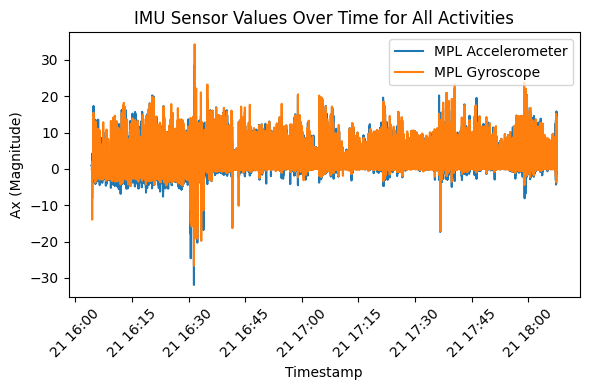

In [37]:
# Separate the data based on the type of IMU sensors
imu_sensors = ['MPL Accelerometer', 'MPL Gyroscope']

# Filter the sensor data for IMU sensors only
imu_data = sensor_data_aligned[sensor_data_aligned['Sensor'].isin(imu_sensors)]

# Plot time series for all activities (for each sensor and its values)
plt.figure(figsize=(6, 4))

for sensor in imu_sensors:
    plt.plot(imu_data[imu_data['Sensor'] == sensor]['timestamp'], 
             imu_data[imu_data['Sensor'] == sensor]['Value1'], label=sensor)

plt.xlabel('Timestamp')
plt.ylabel('Ax (Magnitude)')
plt.title('IMU Sensor Values Over Time for All Activities')
plt.legend(loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


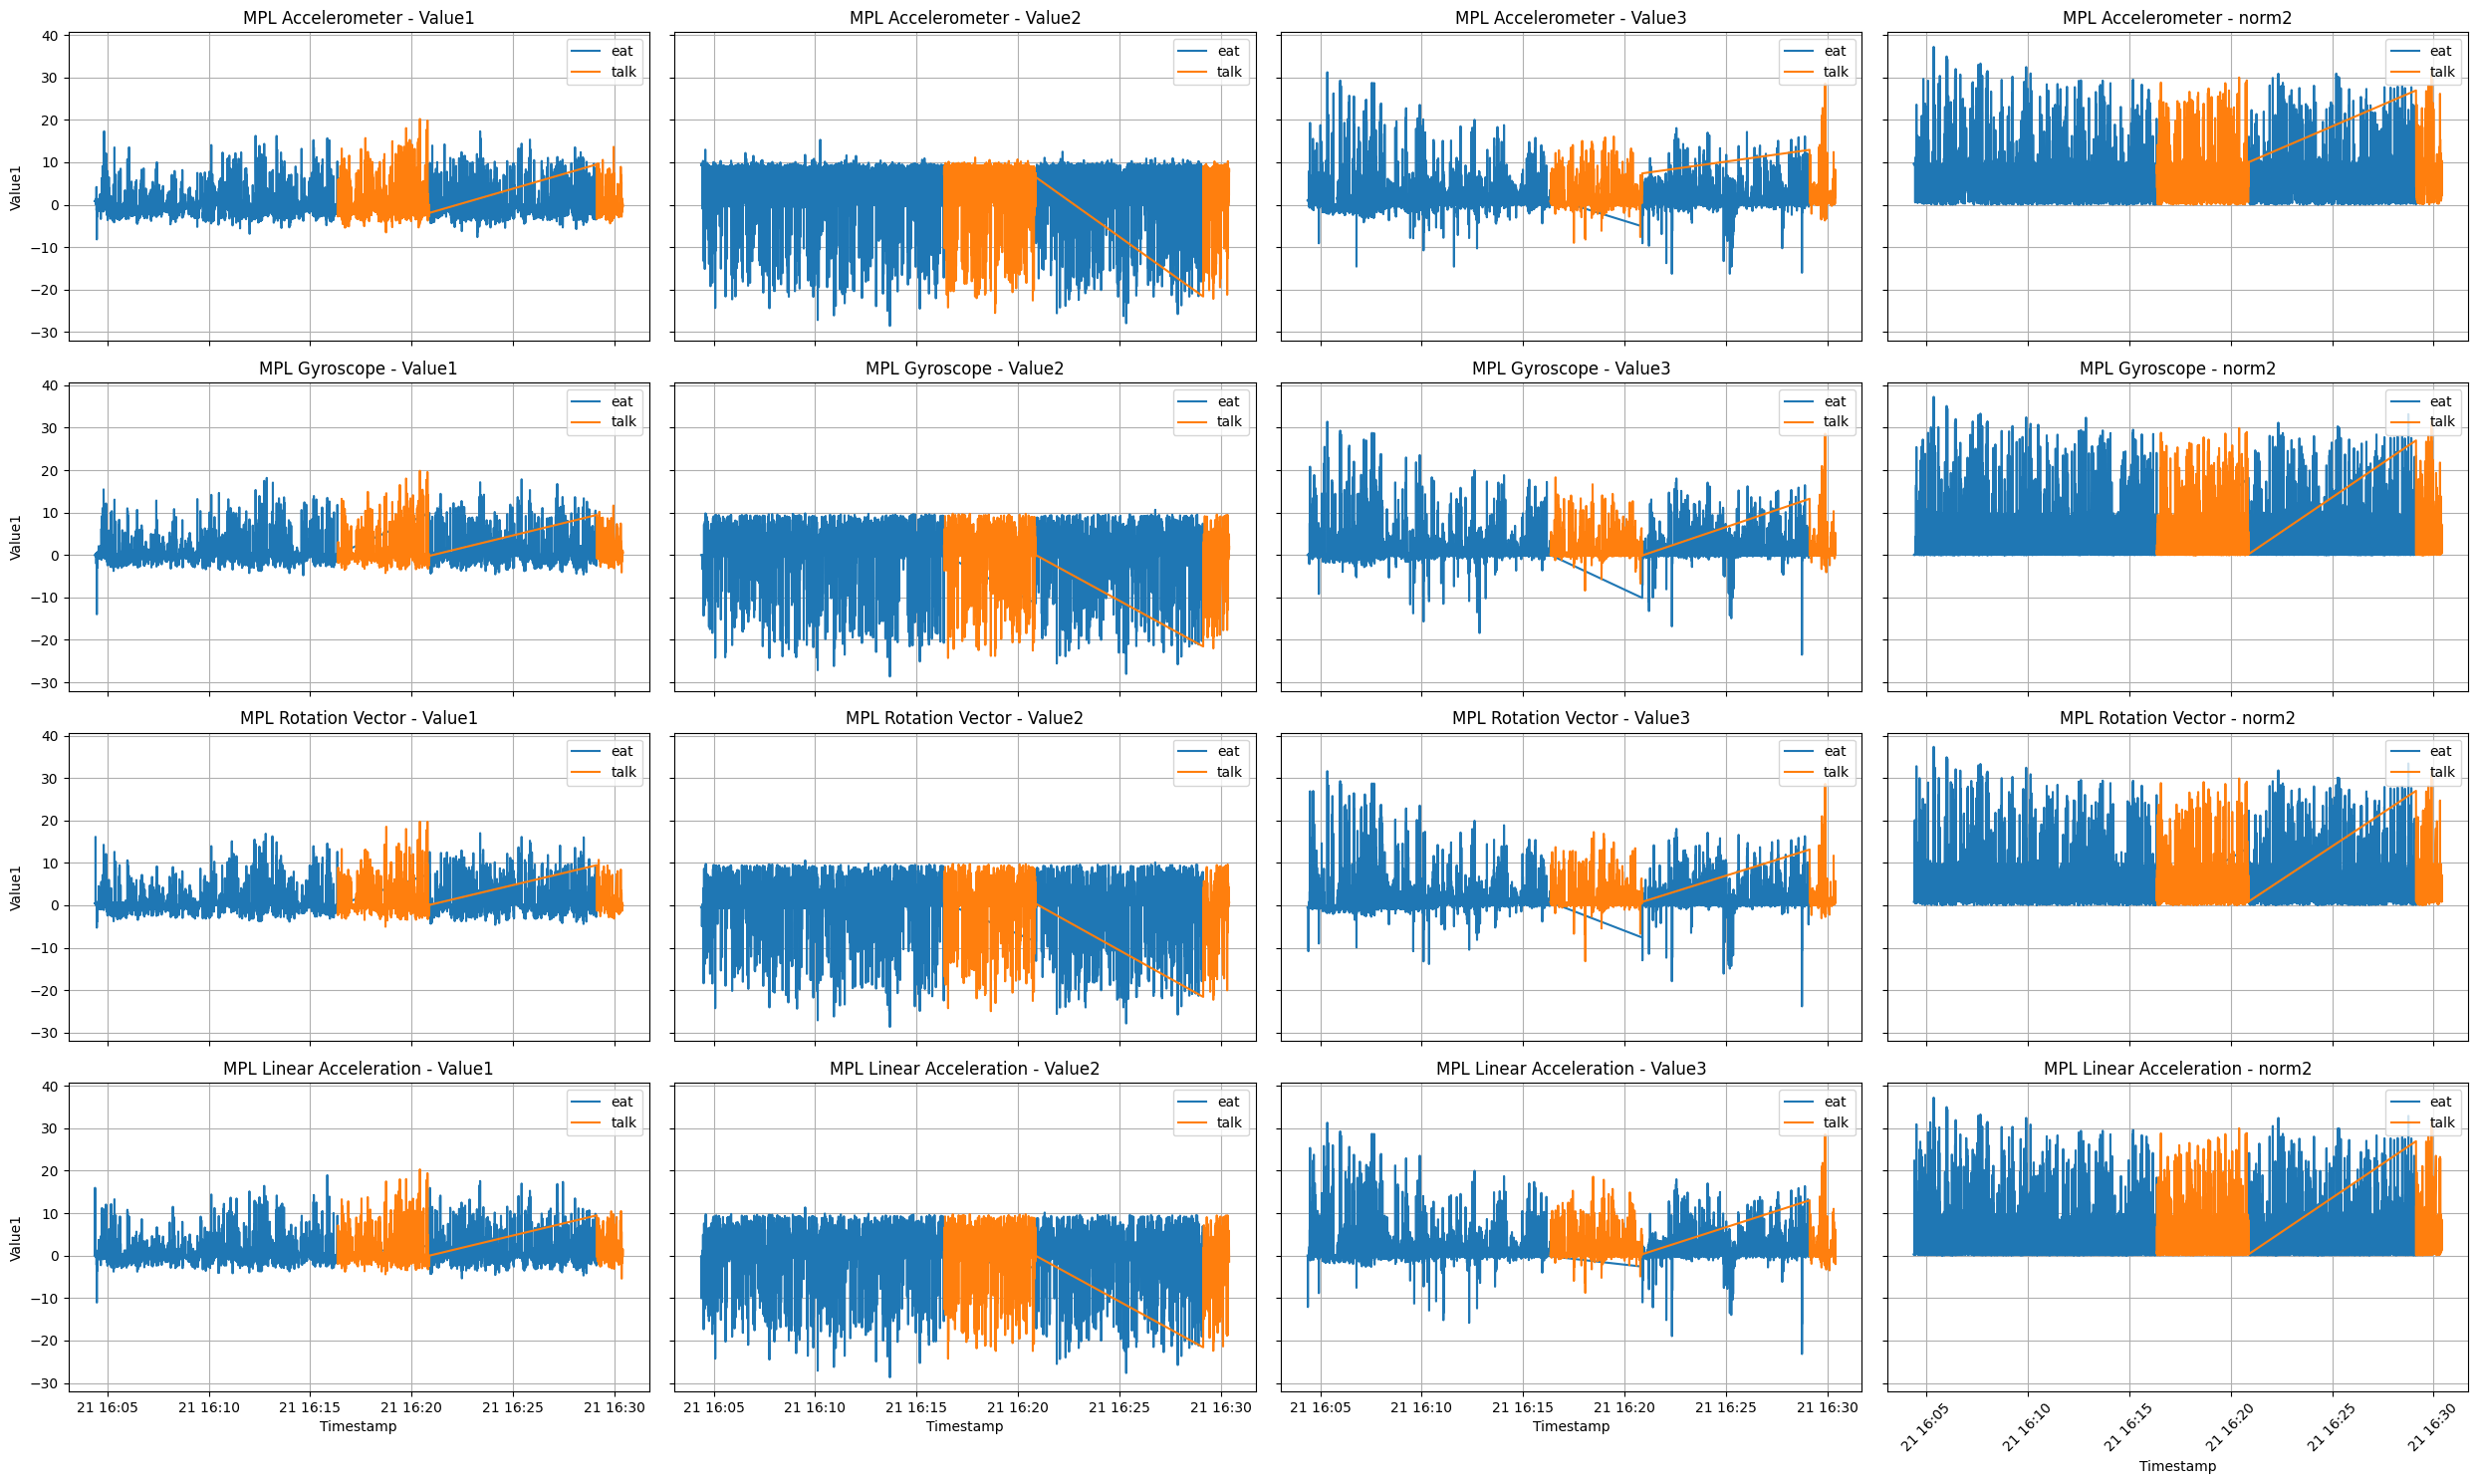

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure the timestamp column is in datetime format if not already
sensor_data_aligned['timestamp'] = pd.to_datetime(sensor_data_aligned['timestamp'])

# Separate the data based on the type of IMU sensors
imu_sensors = ['MPL Accelerometer', 'MPL Gyroscope', 'MPL Rotation Vector', 'MPL Linear Acceleration']
value_columns = ['Value1', 'Value2', 'Value3', 'norm2']
activities = ['eat','talk']
# Filter the sensor data for IMU sensors only
imu_data = sensor_data_aligned[sensor_data_aligned['Sensor'].isin(imu_sensors)]
imu_data = imu_data[imu_data['Activity'].isin(activities)]
# Create subplots for each sensor and value type
fig, axs = plt.subplots(len(imu_sensors), len(value_columns), figsize=(25, 15), sharex='all', sharey='all')

for i, sensor in enumerate(imu_sensors):
    sensor_data = imu_data[imu_data['Sensor'] == sensor]
    
    for j, value_col in enumerate(value_columns):
        # Plot data with activity labels for each value column
        for activity in sensor_data['Activity'].unique():
            activity_data = sensor_data[sensor_data['Activity'] == activity]
            axs[i, j].plot(activity_data['timestamp'], activity_data[value_col], label=activity)
        
        axs[i, j].set_title(f'{sensor} - {value_col}')
        axs[i, j].grid(True)
        if i == len(imu_sensors) - 1:
            axs[i, j].set_xlabel('Timestamp')
        if j == 0:
            axs[i, j].set_ylabel(value_col)
        axs[i, j].legend(loc='upper right')
# Adjust layout
# plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


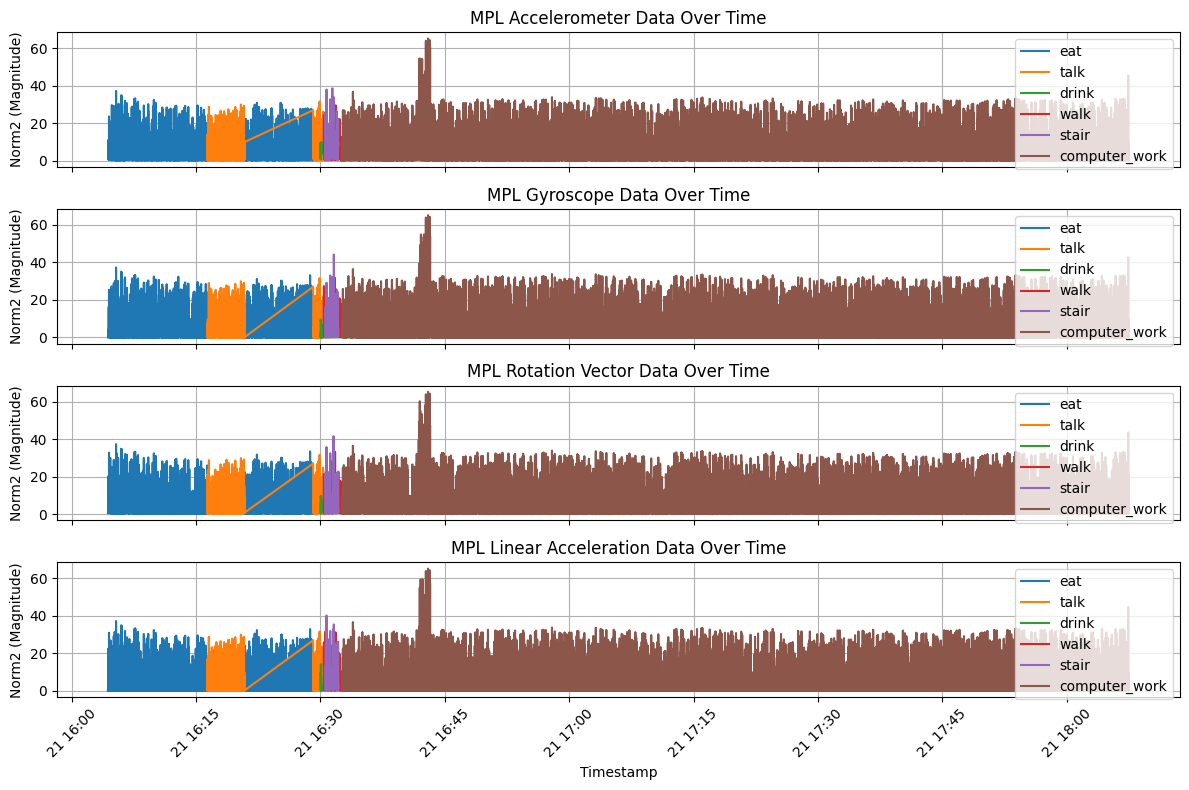

In [39]:
""" Visualizing activity distributuion for person 1 using IMU data (accelerometer and gyroscope) """

# Ensure the timestamp column is in datetime format if not already
sensor_data_aligned['timestamp'] = pd.to_datetime(sensor_data_aligned['timestamp'])

# Separate the data based on the type of IMU sensors
imu_sensors = ['MPL Accelerometer', 'MPL Gyroscope', 'MPL Rotation Vector', 'MPL Linear Acceleration']

# Filter the sensor data for IMU sensors only
imu_data = sensor_data_aligned[sensor_data_aligned['Sensor'].isin(imu_sensors)]

# Create subplots for each sensor
fig, axs = plt.subplots(len(imu_sensors), 1, figsize=(12, 8), sharex=True)

for i, sensor in enumerate(imu_sensors):
    # Filter data for the current sensor
    sensor_data = imu_data[imu_data['Sensor'] == sensor]
    
    # Plot data with activity labels
    for activity in sensor_data['Activity'].unique():
        activity_data = sensor_data[sensor_data['Activity'] == activity]
        axs[i].plot(activity_data['timestamp'], activity_data['norm2'], label=activity)
    
    axs[i].set_ylabel('Norm2 (Magnitude)')
    axs[i].set_title(f'{sensor} Data Over Time')
    axs[i].legend(loc='upper right')
    axs[i].grid(True)

axs[-1].set_xlabel('Timestamp')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


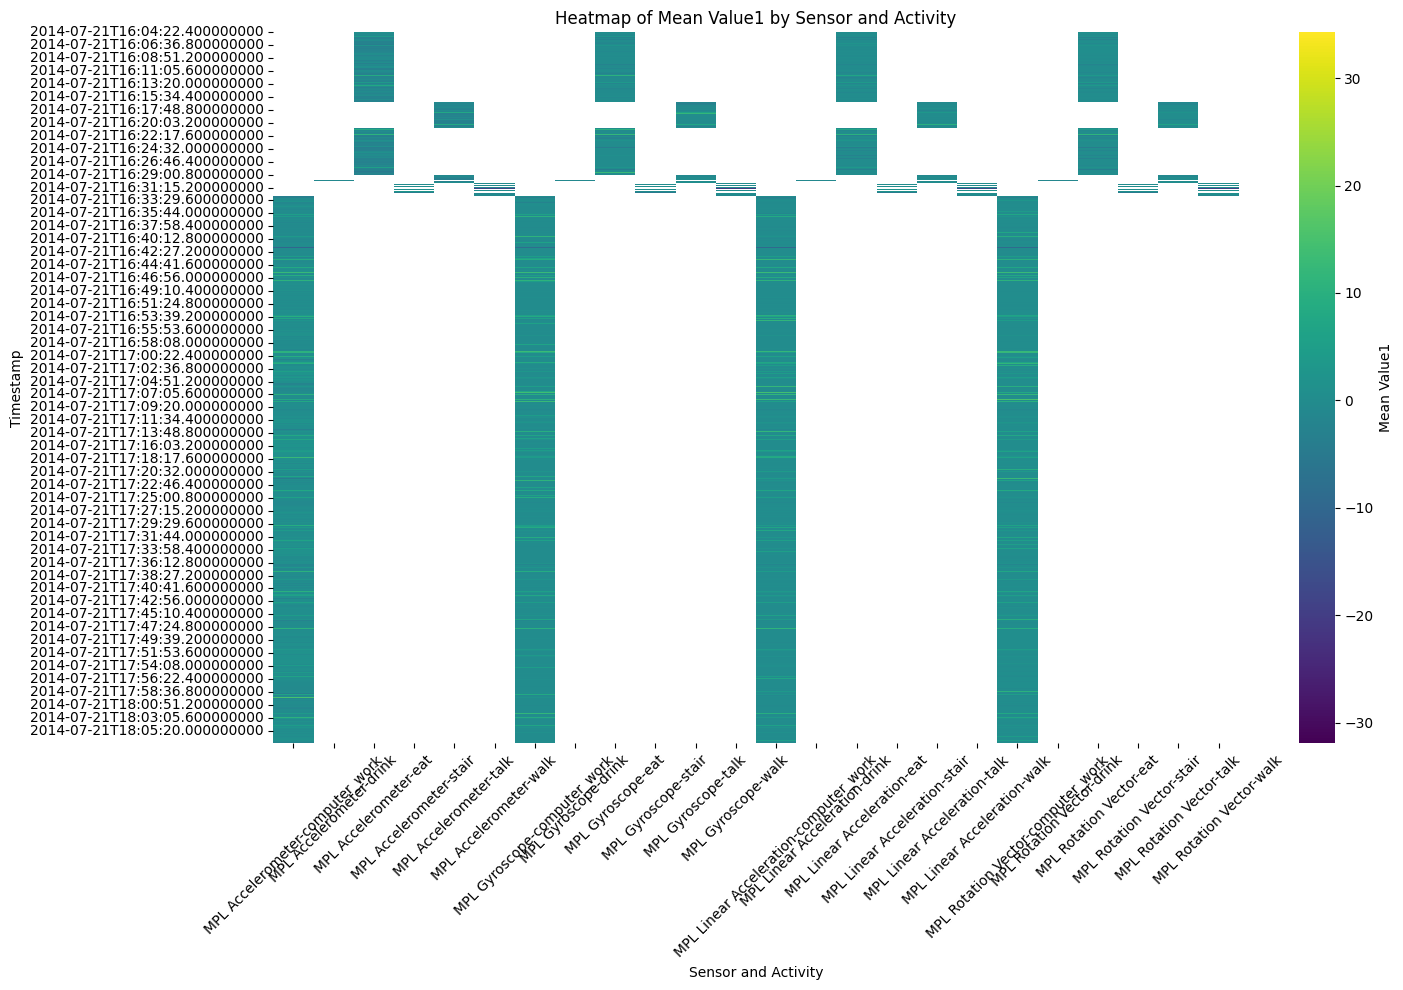

In [40]:
import seaborn as sns

# Pivot the data for heatmap
heatmap_data = imu_data.pivot_table(index='timestamp', columns=['Sensor', 'Activity'], values='Value1', aggfunc='mean')

plt.figure(figsize=(15, 10))
sns.heatmap(heatmap_data, cmap='viridis', cbar_kws={'label': 'Mean Value1'})
plt.title('Heatmap of Mean Value1 by Sensor and Activity')
plt.xlabel('Sensor and Activity')
plt.ylabel('Timestamp')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


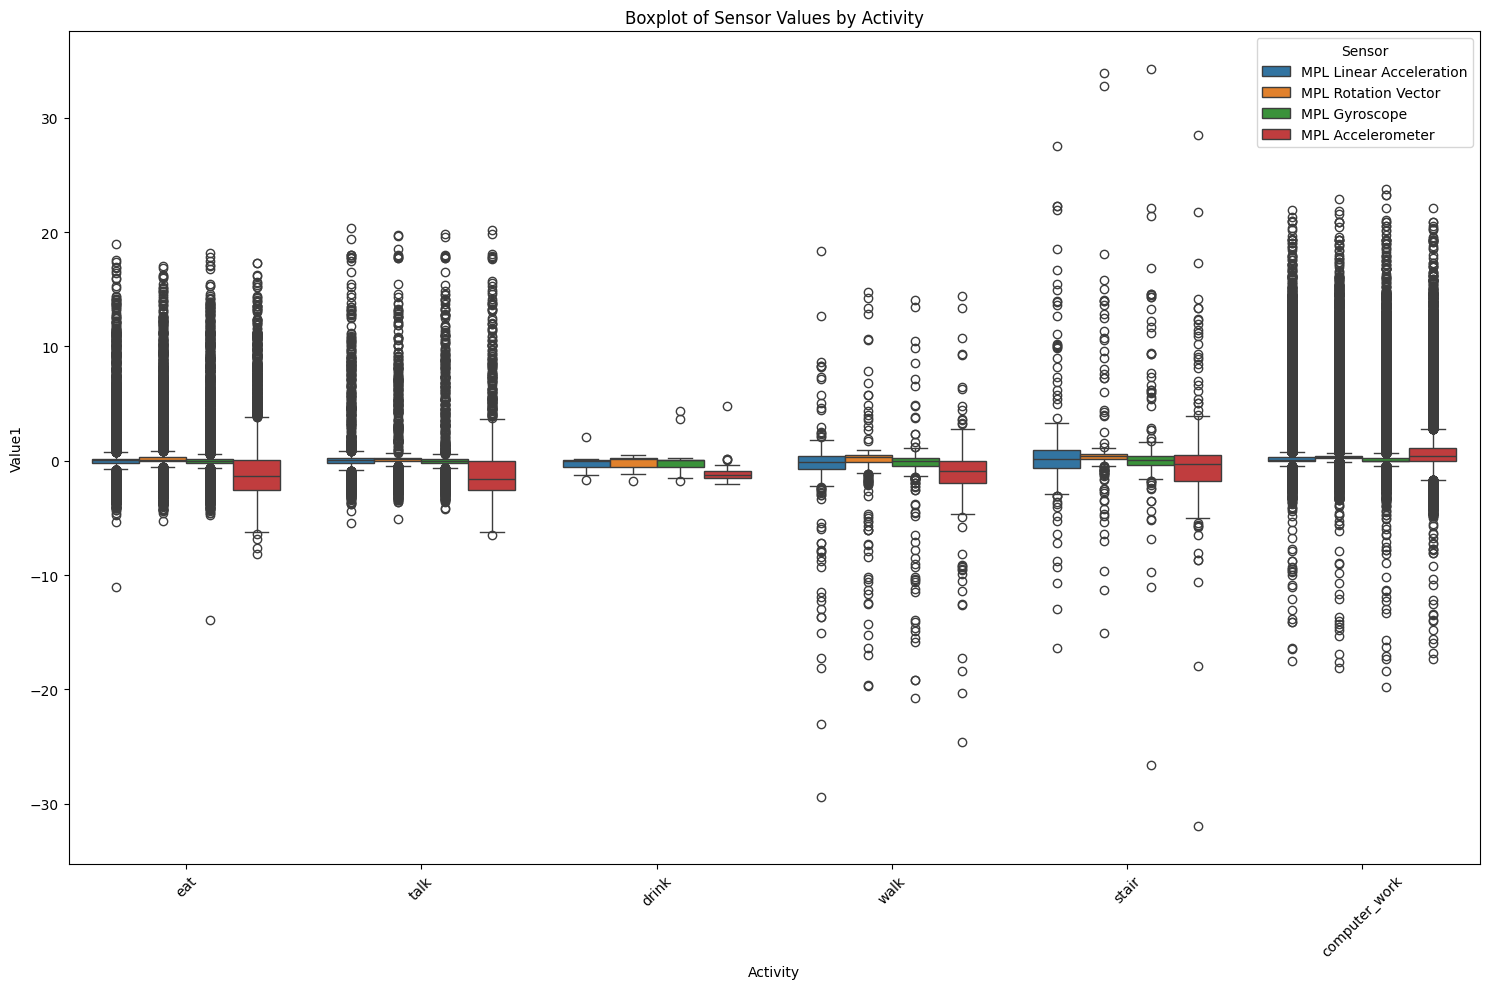

In [41]:
plt.figure(figsize=(15, 10))
sns.boxplot(x='Activity', y='Value1', hue='Sensor', data=imu_data)
plt.title('Boxplot of Sensor Values by Activity')
plt.xlabel('Activity')
plt.ylabel('Value1')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


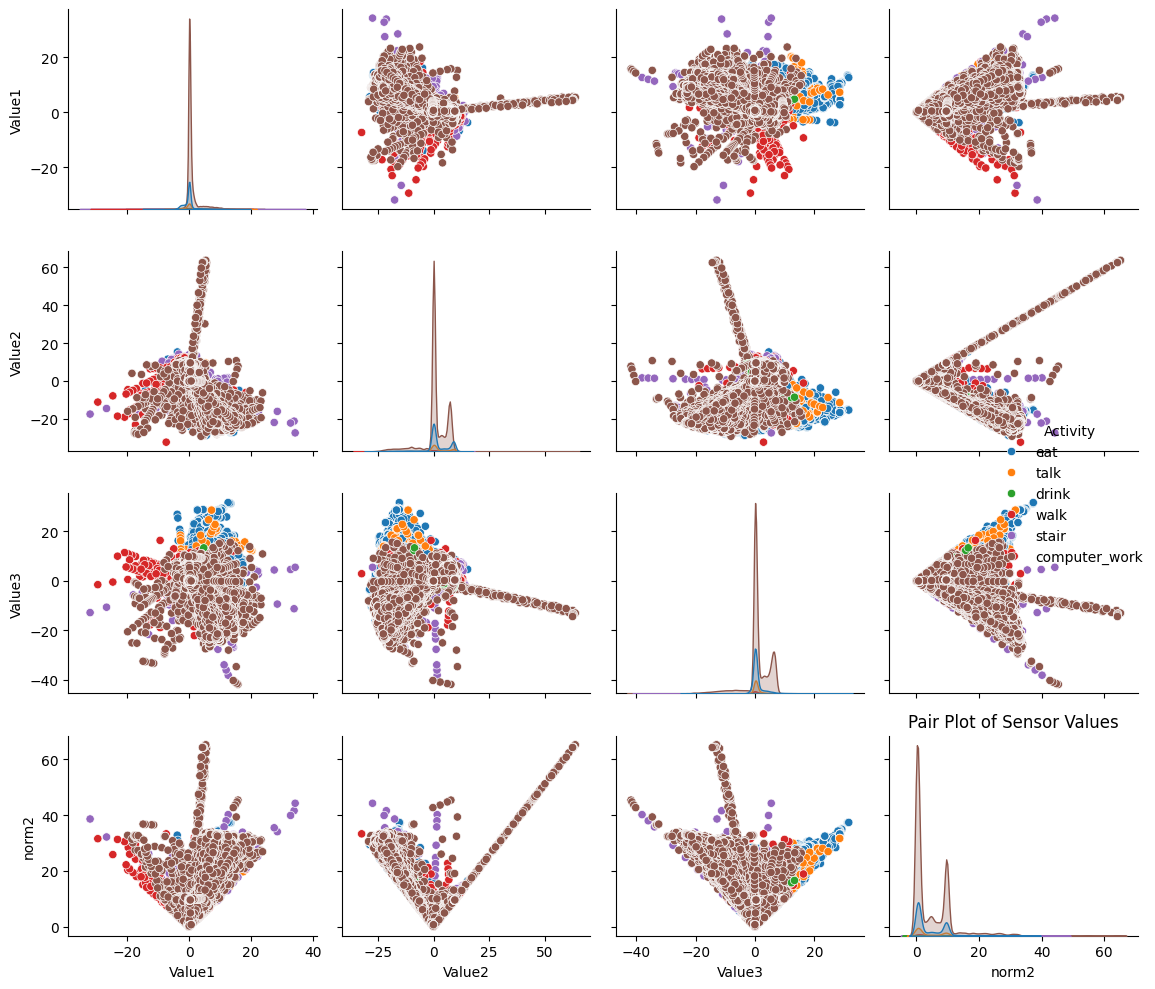

In [42]:
sns.pairplot(imu_data, hue='Activity', vars=value_columns)
plt.title('Pair Plot of Sensor Values')
plt.tight_layout()
plt.show()


C:\Users\rohan\AppData\Local\Temp\ipykernel_9288\3775594325.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  activity_data[f'{value_col}_rolling'] = activity_data[value_col].rolling(window=rolling_window).mean()
C:\Users\rohan\AppData\Local\Temp\ipykernel_9288\3775594325.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  activity_data[f'{value_col}_rolling'] = activity_data[value_col].rolling(window=rolling_window).mean()
C:\Users\rohan\AppData\Local\Temp\ipykernel_9288\3775594325.py:12: SettingWithCo

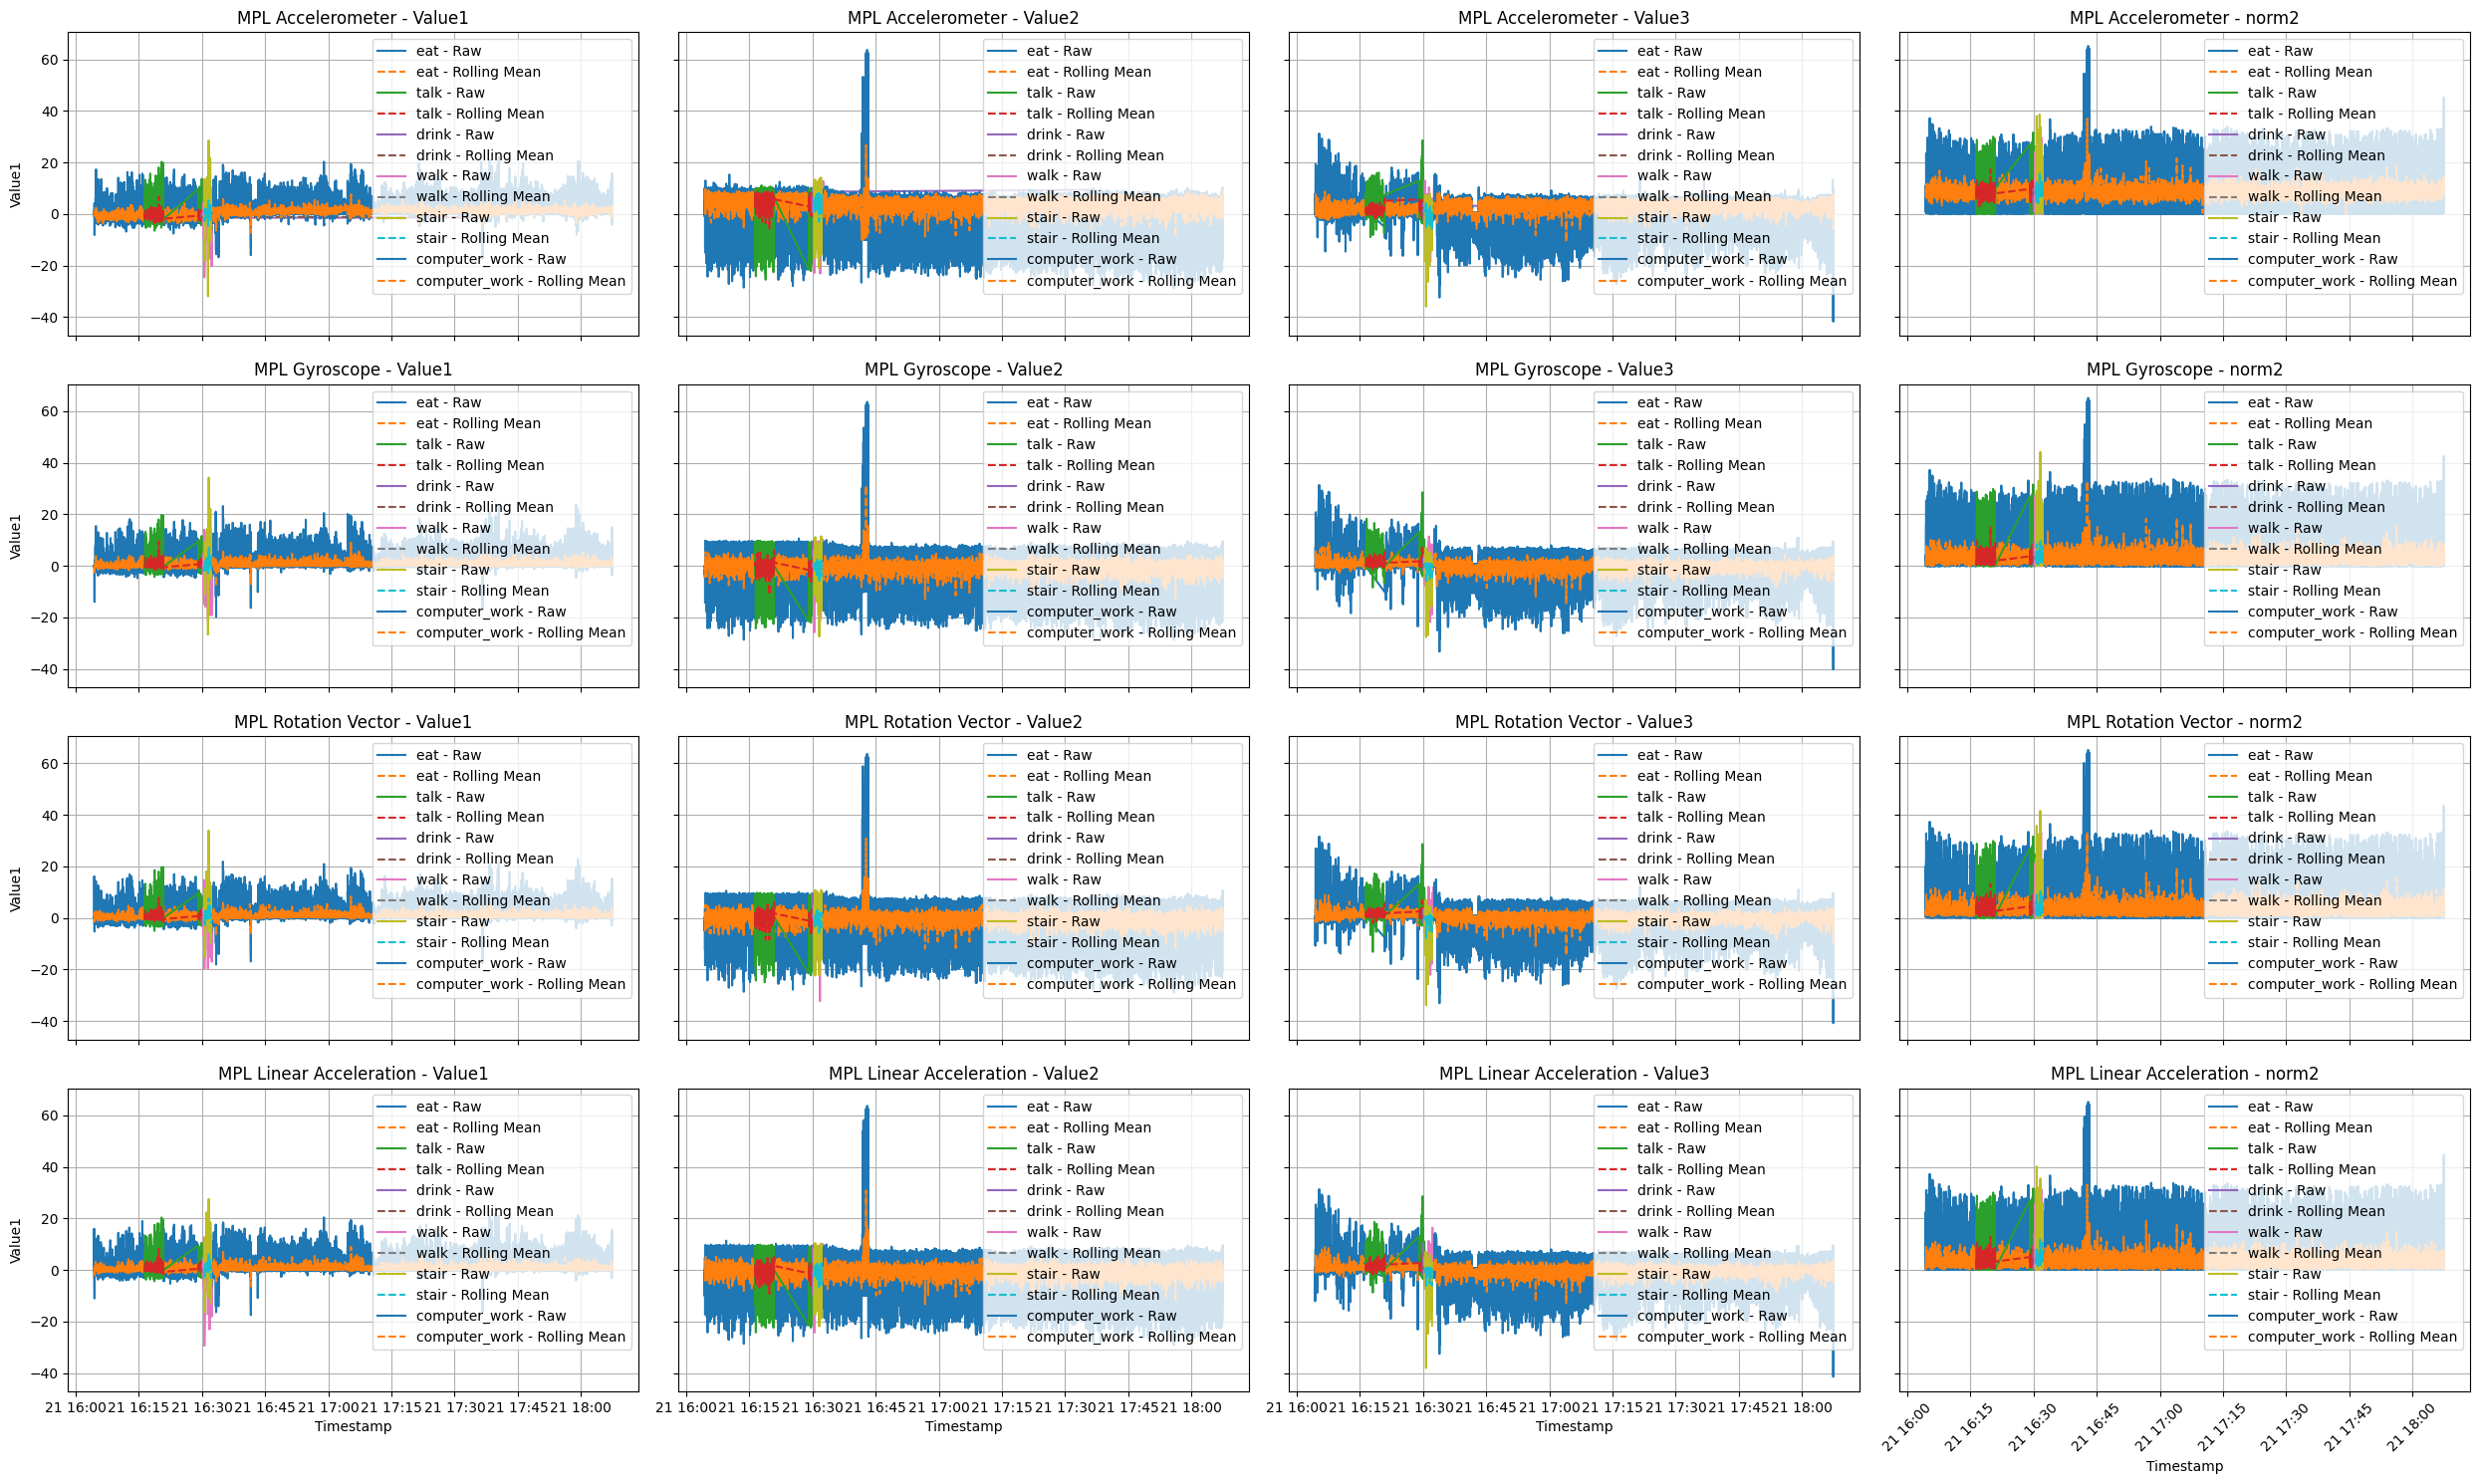

In [43]:
rolling_window = 10  # Adjust window size as needed

fig, axs = plt.subplots(len(imu_sensors), len(value_columns), figsize=(25, 15), sharex='all', sharey='all')

for i, sensor in enumerate(imu_sensors):
    sensor_data = imu_data[imu_data['Sensor'] == sensor]
    
    for j, value_col in enumerate(value_columns):
        for activity in sensor_data['Activity'].unique():
            activity_data = sensor_data[sensor_data['Activity'] == activity]
            axs[i, j].plot(activity_data['timestamp'], activity_data[value_col], label=f'{activity} - Raw')
            activity_data[f'{value_col}_rolling'] = activity_data[value_col].rolling(window=rolling_window).mean()
            axs[i, j].plot(activity_data['timestamp'], activity_data[f'{value_col}_rolling'], label=f'{activity} - Rolling Mean', linestyle='--')
        
        axs[i, j].set_title(f'{sensor} - {value_col}')
        axs[i, j].grid(True)
        if i == len(imu_sensors) - 1:
            axs[i, j].set_xlabel('Timestamp')
        if j == 0:
            axs[i, j].set_ylabel(value_col)
        axs[i, j].legend(loc='upper right')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
# Assuming 'Activity' or 'Status' can be categorized
plt.figure(figsize=(12, 6))

# Scatter plot of Acceleration colored by Activity
scatter = plt.scatter(filtered_data['timestamp'], filtered_data['norm2'], 
                      c=filtered_data['Activity'].astype('category').cat.codes, 
                      cmap='viridis', alpha=0.6)
plt.colorbar(scatter, label='Activity')

# Formatting
plt.xlabel('Timestamp')
plt.ylabel('Acceleration')
plt.title('Linear Acceleration Over Time Colored by Activity')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend
# Show plot
plt.show()
